In [4]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import optimizers
import glob
import matplotlib.pyplot as plt
from skimage.io import imread
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from skimage import color, transform, exposure
from skimage.io import imread
import warnings
warnings.filterwarnings('ignore')

In [5]:
model_traffic = load_model('traffic.h5')
test_data_dir = '../data/model/key19/test'
img_width, img_height = 100, 100
nb_test_samples = int(len(glob.glob(test_data_dir+'/*/*')))
def Adapthisteq(img):
    # scale [-1, 1]
    img = img * (1/255)
    
    #hsv colorspace
    hsv = color.rgb2hsv(img)
    
    # value channel (v)
    hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)

    # central square crop
    min_side = min(img.shape[:-1])
    centre = img.shape[0] // 2, img.shape[1] // 2
    img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
              centre[1] - min_side // 2:centre[1] + min_side // 2,
              :]

    # rescale to standard size
    img = transform.resize(img, (img_width, img_height,3))

    return img
test_datagen = ImageDataGenerator(preprocessing_function=Adapthisteq)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    shuffle = False,
    class_mode='categorical')
test_pred_prob = model_traffic.predict_generator(test_generator,steps = nb_test_samples, verbose=1)
test_pred_labels_1 = np.argmax(test_pred_prob, axis=-1)
acc = 1-np.sum(test_pred_labels_1!=test_generator.classes[:nb_test_samples])/nb_test_samples
print(acc)

Found 153 images belonging to 6 classes.
153/153 [==============================] - 4s     
0.686274509804


In [8]:
model_CNN = load_model('CNN.h5')
img_width, img_height = 256, 256
def preprocess_img(img):
    img = img.astype(np.float32) / 255.0
    img = np.reshape(img, (256,256))
    img = exposure.equalize_adapthist(img)
    img = img.reshape(img.shape + (1,))
    return img
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_img)
test_data_dir = '../data/model/key19/test'
nb_test_samples = int(len(glob.glob(test_data_dir+'/*/*.png')))


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    shuffle = False,
    color_mode =  "grayscale",
    class_mode='categorical')

test_pred_prob = model_CNN.predict_generator(test_generator,steps = 153 // 1, verbose=1)
test_pred_labels_2 = np.argmax(test_pred_prob, axis=-1)
acc = 1-np.sum(test_pred_labels_2!=test_generator.classes)/nb_test_samples
print(acc)

Found 153 images belonging to 6 classes.
152/153 [============================>.] - ETA: 0s0.751633986928


In [9]:
model_VGG = load_model('VGG16.h5')
img_width, img_height = 256, 256
test_data_dir = '../data/model/key19/test'
nb_test_samples = int(len(glob.glob(test_data_dir+'/*/*')))
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    shuffle = False,
    class_mode='categorical')
test_pred_prob = model_VGG.predict_generator(test_generator,steps = nb_test_samples, verbose=1)
test_pred_labels_3 = np.argmax(test_pred_prob, axis=-1)
acc = 1-np.sum(test_pred_labels_3!=test_generator.classes[:nb_test_samples])/nb_test_samples
print(acc)

Found 153 images belonging to 6 classes.
150/153 [============================>.] - ETA: 0s0.751633986928


In [10]:
t1, t2, t3 = test_pred_labels_1, test_pred_labels_2, test_pred_labels_3

In [11]:
T = np.matrix((t1,t2,t3))
T = np.asarray(T)

In [12]:
test_result = np.zeros((t1.shape[0],1))
for i, column in enumerate(T.transpose()):
    
    test_result[i] = np.bincount(column).argmax()
test_result = test_result.transpose()

In [13]:
acc = 1-np.sum(test_result!=test_generator.classes[:nb_test_samples])/nb_test_samples
print(acc)

0.758169934641


Classified as pos 2.0


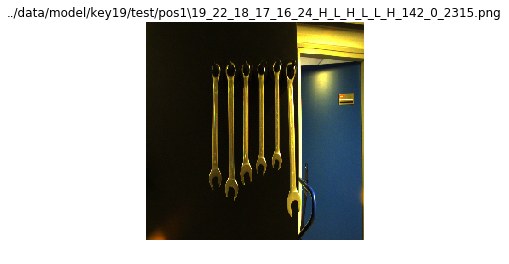

Classified as pos 2.0


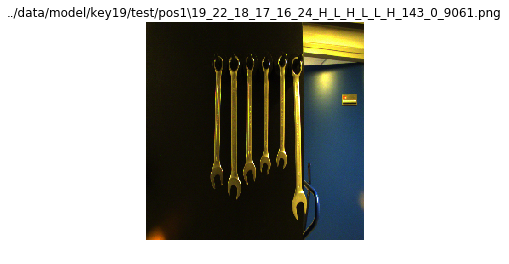

Classified as pos 2.0


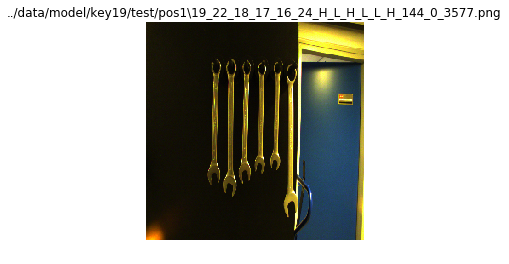

Classified as pos 4.0


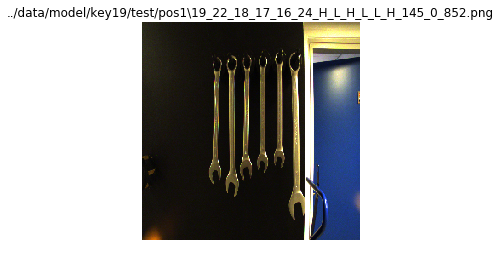

Classified as pos 6.0


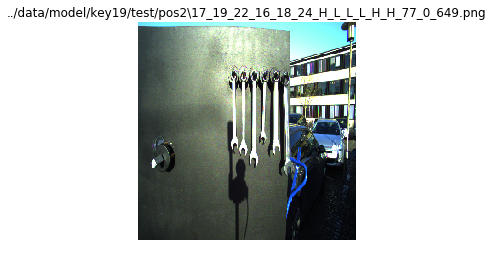

Classified as pos 3.0


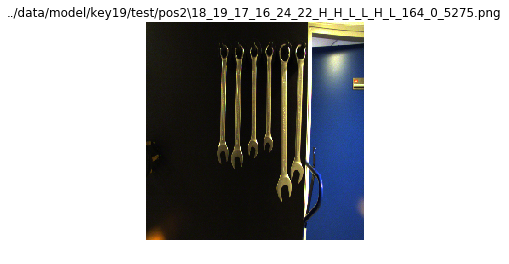

Classified as pos 4.0


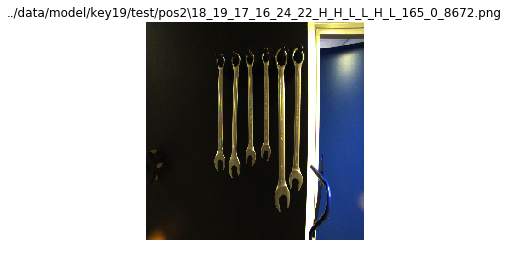

Classified as pos 4.0


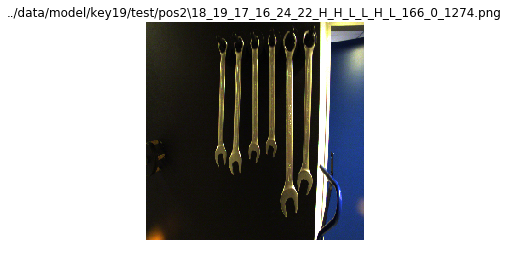

Classified as pos 4.0


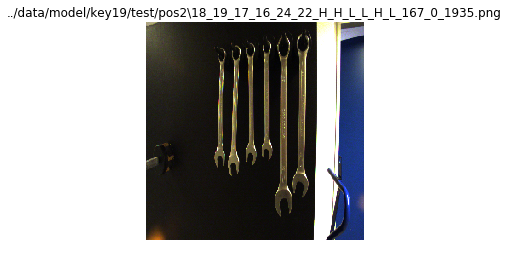

Classified as pos 4.0


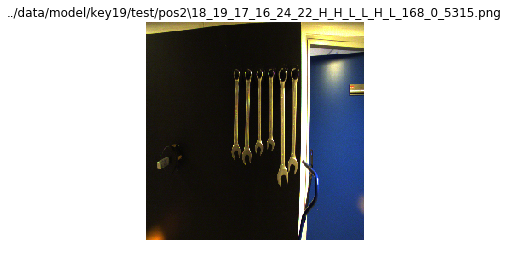

Classified as pos 1.0


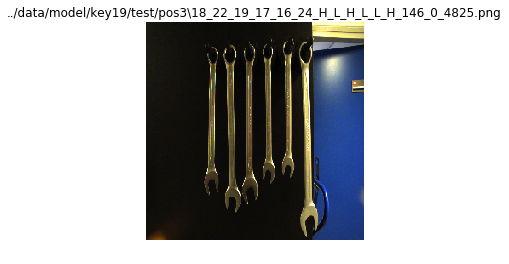

Classified as pos 4.0


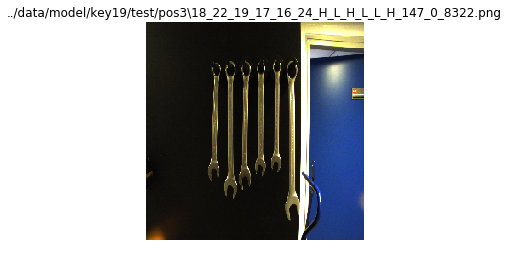

Classified as pos 1.0


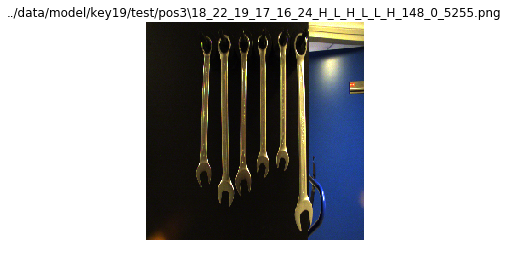

Classified as pos 1.0


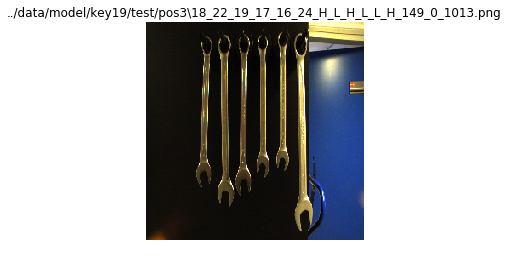

Classified as pos 1.0


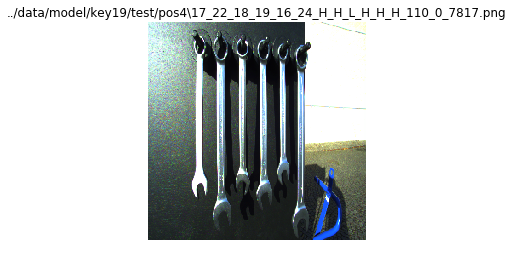

Classified as pos 1.0


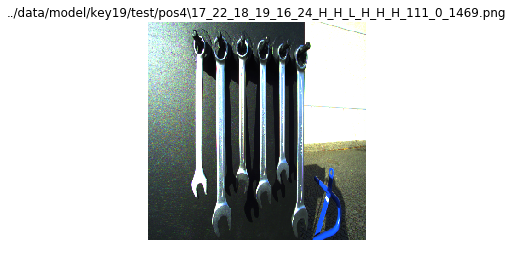

Classified as pos 1.0


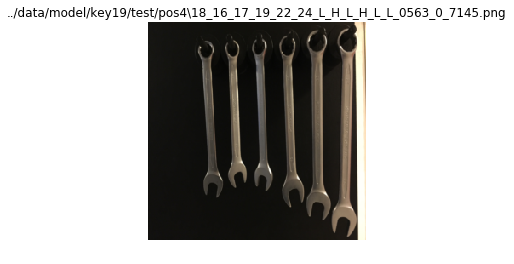

Classified as pos 1.0


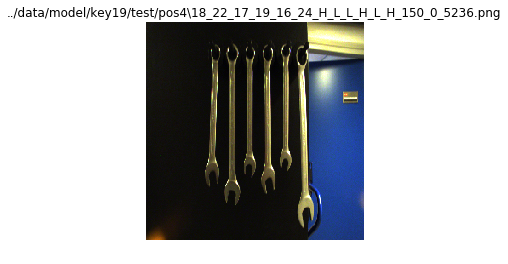

Classified as pos 2.0


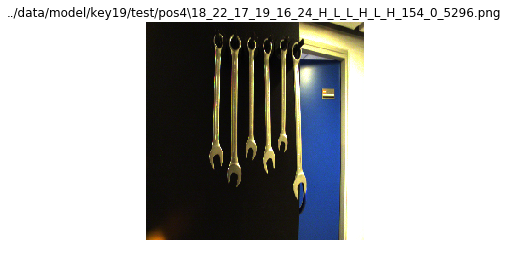

Classified as pos 6.0


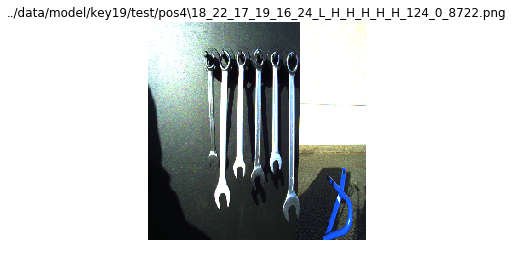

Classified as pos 6.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Classified as pos 4.0


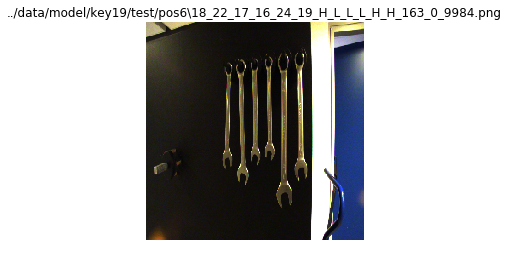

Classified as pos 4.0


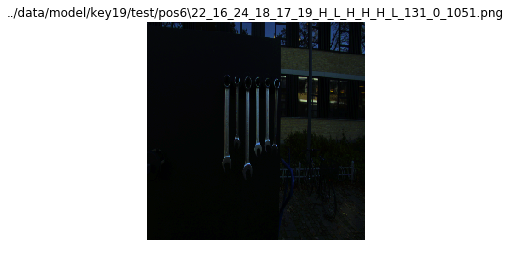

Classified as pos 1.0


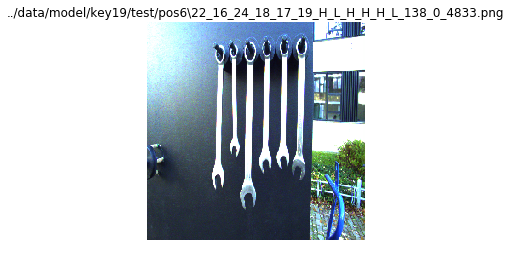

Classified as pos 2.0


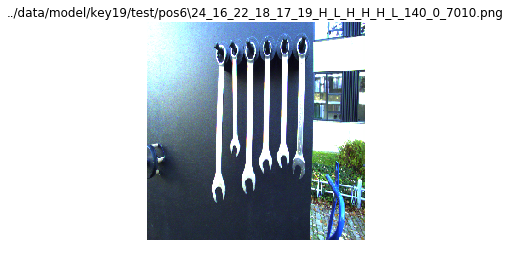

In [14]:
idx = np.array(np.where(test_result[0,:]!=test_generator.classes))
for i in range(0,idx.shape[1]):
    print('Classified as pos {}'.format(test_result[0,idx[0,i]]+1))
    filename = '../data/model/key19/test/'+test_generator.filenames[idx[0,i]]
    plt.figure()
    image = imread(filename)
    plt.imshow(image)
    plt.title(filename)
    plt.axis('off')
    plt.show()

In [163]:
test_result[0,idx[0,i]]

5.0

In [160]:
idx.shape[1]

14